# Valor de Inmuebles

Existen muchas variables que inciden en el valor de un inmueble. Para los potenciales **compradores** no es fácil tomar una decisión respecto a **qué inmueble minimiza su gasto y maximiza su inversión y su calidad de vida en términos de seguridad movilidad, área, impuestos, etc.**


A continuación se presenta un conjunto de datos donde cada registro representa un
barrio, se suministra la información de valor medio de los inmuebles y demás
caracteristicas internas y externas. Con dicha información deben solucionarse las
siguientes preguntas.

1. ¿Cuáles considera que son las variables que determinan el precio de la vivienda?

2. Formule hipótesis sobre cómo las variables descritas en el punto anterior
pueden incidir en el precio de los inmuebles, yendo más allá de los resultados
matemáticos.

3. ¿Qué otras variables cree que podrían afectar el precio de la vivienda y que no
están incluidas en el conjunto?

4. Dada la información disponible, ¿cuales considera que son observaciones
atípicas?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_excel("00 Prueba Data Scientist.xlsx",header=0,index_col="index")
print "Tamaño de la matriz de entrada: ",raw_data.shape
raw_data.head()

Tamaño de la matriz de entrada:  (506, 14)


,crimen,residencial,industrial,rio,oxidonitroso,cuartos,distanciaempleo,movilidad,impuestos,tasaeducativa,pobreza,valor,coordx,coordy
index,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,4.0900,1,296,15.3,4.98,458.40480,0.624174,-1.344583
2,0.02731,0.0,7.07,0,0.469,6.421,4.9671,2,242,17.8,9.14,412.56432,1.150258,-1.410891
3,0.02729,0.0,7.07,0,0.469,7.185,4.9671,2,242,17.8,4.03,662.77694,1.077415,-1.596554
4,0.03237,0.0,2.18,0,0.458,6.998,6.0622,3,222,18.7,2.94,637.94668,1.239287,-1.702648
5,0.06905,0.0,2.18,0,0.458,7.147,6.0622,3,222,18.7,5.33,691.42724,1.320223,-1.782218


¿Cómo influyen las variables en el precio de un inmueble?

In [3]:
raw_data.describe() #Observar algunos estadisticos basicos para describir las caracterisitcas

,crimen,residencial,industrial,rio,oxidonitroso,cuartos,distanciaempleo,movilidad,impuestos,tasaeducativa,pobreza,valor,coordx,coordy
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,5.060000e+02
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,3.795043,9.549407,408.237154,18.455534,12.653063,430.381107,-3.241107e-09,-1.936759e-09
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,2.105710,8.707259,168.537116,2.164946,7.141062,175.666527,1.000000e+00,1.000000e+00
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,1.129600,1.000000,187.000000,12.600000,1.730000,95.501000,-3.017948e+00,-3.267523e+00
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,2.100175,4.000000,279.000000,17.400000,6.950000,325.180905,-5.773219e-01,-4.875481e-01
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,3.207450,5.000000,330.000000,19.050000,11.360000,404.924240,2.686564e-02,-4.626645e-02
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,5.188425,24.000000,666.000000,20.200000,16.955000,477.505000,5.796587e-01,4.885100e-01
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,12.126500,24.000000,711.000000,22.000000,37.970000,955.010000,2.663761e+00,3.091442e+00


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
crimen             506 non-null float64
residencial        506 non-null float64
industrial         506 non-null float64
rio                506 non-null int64
oxidonitroso       506 non-null float64
cuartos            506 non-null float64
distanciaempleo    506 non-null float64
movilidad          506 non-null int64
impuestos          506 non-null int64
tasaeducativa      506 non-null float64
pobreza            506 non-null float64
valor              506 non-null float64
coordx             506 non-null float64
coordy             506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


**Observaciones**

- Solo la variable rio es binaria. 
- movilidad e impuestos discreta. Las demas son continuas.
- no hay valores nulos

In [5]:
features = [col for col in raw_data.columns if col!= 'valor']
X = raw_data[features]
y = raw_data.valor

(array([  21.,   55.,   82.,  154.,   84.,   41.,   30.,    8.,   10.,   21.]),
 array([  95.501 ,  181.4519,  267.4028,  353.3537,  439.3046,  525.2555,
         611.2064,  697.1573,  783.1082,  869.0591,  955.01  ]),
 <a list of 10 Patch objects>)

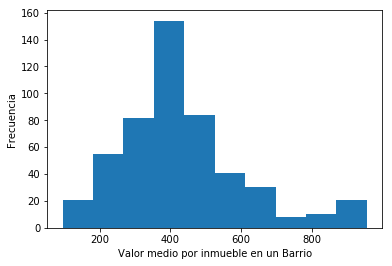

In [6]:
plt.xlabel("Valor medio por inmueble en un Barrio")
plt.ylabel("Frecuencia")
plt.hist(raw_data.valor, bins=10)

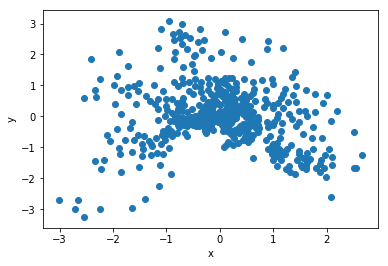

In [7]:
plt.scatter(X.coordx,X.coordy)
plt.xlabel("x")
plt.ylabel("y")

Podemos observar que el valor de un inmueble se concentra entre los valores 353.3537,  439.3046. 

In [8]:
from random import randint
df = raw_data.copy()
#df['valor_bucket'] = pd.cut(df.valor,bins = [0,350,440,750,1000], labels=[1,2,3,4])
df['valor_bucket'] = pd.cut(df.valor,bins = [0,750,1000], labels=[1,2])

def color_column(df, column, newcolumn):
    """Asign a color according to classes present in column"""
    df[newcolumn] = np.nan
    clases = df[column].unique()
    for clas in clases:
        df[newcolumn][df[column]==clas]= '%06X' % randint(0, 0xFFFFFF)
    df[newcolumn] = "#"+df[newcolumn]
    return df

df = color_column(df,'valor_bucket','color_valor')

/home/wanda/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
import plotly.plotly as py
import plotly.graph_objs as go

def plot_map(df, col, scale, title,color_col):
    '''Plot a city map according to certain value'''
    df[col+'_norm'] = scale*(1.0*df[col]-df[col].min())/(df[col].max()-df[col].min())
    if color_col != None:
        color = df[color_col]
    else:
        #color = 'blue'
        color = '#66ccff'
    # Create a trace
    trace = go.Scatter(
        x = df.coordx,
        y = df.coordy,
        text = "X: "+df.coordx.astype(str)+"<br>Y: "+df.coordy.astype(str)+"<br>"+col+": "+df[col].astype(str),
        mode = 'markers',
        marker = dict(
            size = df[col+'_norm'],
            color = color,       
        )
    )

    data = [trace]

    layout = go.Layout(
            title = title,
    )

    fig = dict( data=data, layout=layout )
    return py.iplot( fig, validate=False, filename='d3-bubble-map-populations' )


In [10]:
plot_map(df, col = 'valor', scale = 10, title = 'Mapa de Valores de inmueble en una ciudad',color_col = 'color_valor')

In [11]:
plot_map(df, col = 'crimen', scale = 20, title = 'Crimen',color_col = None)

In [12]:
plot_map(df, col = 'pobreza', scale = 20, title = 'Pobreza',color_col = None)

In [13]:
plot_map(df, col = 'industrial', scale = 15, title = 'Porción de uso Industrial',color_col = None)

In [14]:
plot_map(df, col = 'residencial', scale = 15, title = 'Porción de uso residencial',color_col = None)

In [15]:
plot_map(df, col = 'tasaeducativa', scale = 10, title = 'Tasa Educativa',color_col = None)

In [16]:
plot_map(df, col = 'rio', scale = 10, title = 'Cercanía al río',color_col = None)

In [17]:
plot_map(df, col = 'distanciaempleo', scale = 20, title = 'Distancia al empleo',color_col = None)

Visualizando con la informacion espacial tenemos que:
- Los precios de inmuebles varian, pero los mas altos estan en el norte de la ciudad
- En la parte centro-sur el crimen es mayor, también la pobreza.
- El trabajo y mayor desarrollo industrail se concentran en el centro, cerca de un rio. 
- La educación no parece tan inequitativa. Pero hay más hacia el centro

Para observar relaiones entre variables a continuación se realiza un gráfico de disperción, que ademas permite ver la distribución de  la muestra de datos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed5044a450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fed4f35f690>]], dtype=object)

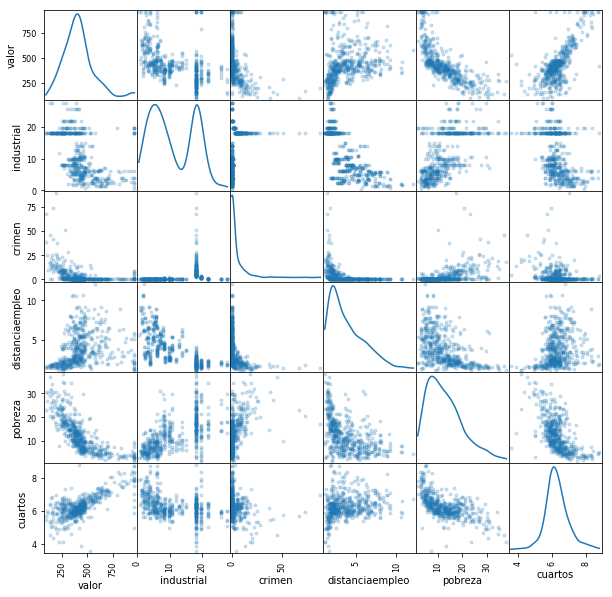

In [20]:
pd.scatter_matrix(df[['valor','industrial','crimen','distanciaempleo','pobreza','cuartos']],figsize=(10,10),alpha=0.2,diagonal='kde')#'coordy'

## 1. ¿Cuáles considera que son las variables que determinan el precio de la vivienda?

Antes de realizar pruebas y basándome en las visualizaciones e intuición

- La ubicacion espacial  (si esta en el centro-norte parece tener los inmuebles más costosos)
- La distancia al empleo.
- La industria, que tanto desarrollo hay en la zona.
- La presencia del rio parece estar ligada al desarrollo industrial y el precio por inmueble.
- El crimen en la zona. (en el centro es mayor)
- El número de cuartos puede dar idea del tamaño del inmueble.

## Selección de características

Deseamos saber que características influyen en el precio de un inmueble, esto podría abordarse como un problema de regresión. $X\beta + b = Y $ donde $X$ son nuestros datos de entrada $Y$ es una variable continua (el 'valor') y $b$ un error aleatorio. Para seleccionar las variables que mas contribuyen a un buen modelo podemos aplicar diferentes métodos.

### Selección de Características recursiva

Este método toma un modelo (por ejemplo una maquina de vectores de soporte) la cual asigna un vector de pesos $\beta$ a las diferentes características de entrada. Selecciona las mejores características probando subconjuntos de características cada vez más pequeños.

In [18]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, None, step=1) #Seleccionando la mitad de caracteristicas
selector = selector.fit(X, y)
#print selector.support_ 
#print X.columns
#print selector.ranking_

for i in range(len(X.columns)):
    print X.columns[i],selector.ranking_[i] #inversamente proporcional al aporte de la var predictora

print "\n Características importantes: ",X.columns[selector.support_ ]
print "\n No fueron selecionadas por RFE: ",X.columns[selector.support_ == False]


crimen 5
residencial 6
industrial 3
rio 1
oxidonitroso 2
cuartos 1
distanciaempleo 1
movilidad 7
impuestos 8
tasaeducativa 1
pobreza 1
coordx 4
coordy 1

 Características importantes:  Index([u'rio', u'cuartos', u'distanciaempleo', u'tasaeducativa', u'pobreza',
       u'coordy'],
      dtype='object')

 No fueron selecionadas por RFE:  Index([u'crimen', u'residencial', u'industrial', u'oxidonitroso', u'movilidad',
       u'impuestos', u'coordx'],
      dtype='object')


# Selección por medio de Bosques Aleatorios

Además de proporcionar regresores o clasificadores, los bosques aleatorios permiten calcular el grado en que una variable influye en el método, en regresión esto se mide por medio de la varianza. 

In [19]:
from sklearn.ensemble import RandomForestRegressor
names = X.columns
rf = RandomForestRegressor()
rf.fit(X, y)
print "Características segun score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)

Características segun score:
[(0.4708, u'cuartos'), (0.3152, u'pobreza'), (0.0724, u'distanciaempleo'), (0.0431, u'crimen'), (0.029, u'oxidonitroso'), (0.025, u'coordy'), (0.0149, u'tasaeducativa'), (0.0135, u'impuestos'), (0.0086, u'coordx'), (0.0039, u'industrial'), (0.0024, u'movilidad'), (0.0007, u'residencial'), (0.0006, u'rio')]


Ambos métodos y las visualizaciones sugieren que las variables:

- distancia empleo
- pobreza
- Cuartos
- Coordy
- educación

Estan muy ligadas al valor de un inmueble. Sin embargo no hay coincidencia sobre las características: crimen, rio, oxidonitroso.

Las características que no aportan gran información sobre el valor son: 
- residencial
-  movilidad.


# 2. Formule hipótesis sobre cómo las variables descritas en el punto anterior pueden incidir en el precio de los inmuebles, yendo más allá de los resultados matemáticos.


- El valor está relacionado de manera inversamente proporcional al crimen y pobreza.
- El número de cuartos es una variable es proporcional al valor del inmueble.
- La presencia del rio parece estar ligada al desarrollo industrial y el aumento del precio por inmueble.
- Mayor número de personas buscan una menor distancia al empleo desde sus casas por lo cual esto aumenta la demanda de inmuebles hacia el centro de la ciudad.
- La coordenada 'y' esta relacionada con el crimen y el valor del inmueble. Hacia el norte aumentan los precios y disminuye el crimen.

# 3. ¿Qué otras variables cree que podrían afectar el precio de la vivienda y que no están incluidas en el conjunto?


- Antiguedad promedio de los inmuebles.
- Área en $m^2$. Ya que la distribución de espacio varía.
- Estrato socio-económico.
- Se pueden añadir nuevas características a partir de las que ya existen: feature crosses xy.


# 4.  Dada la información disponible, ¿cuales considera que son observaciones atípicas?

Los valores atípicos son aquellos datos que se alejan demasiado del comportamiento de los demás datos. Un valor atípico no necesariamente es un error.

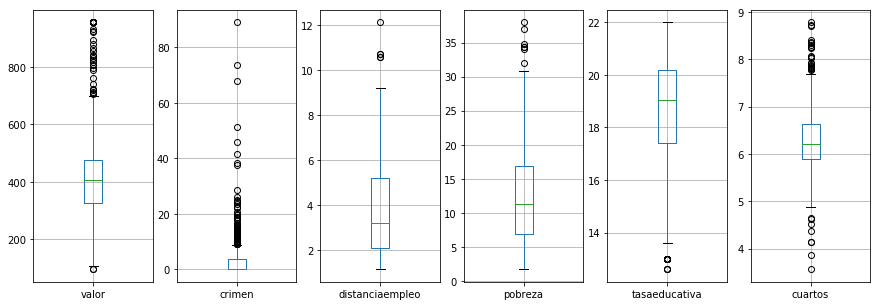

In [23]:
# Analizar
plt.figure(figsize=(15,5))
plt.subplot(1,6,1)
df.boxplot(column='valor')
plt.subplot(1,6,2)
df.boxplot(column='crimen')
plt.subplot(1,6,3)
df.boxplot(column='distanciaempleo')
plt.subplot(1,6,4)
df.boxplot(column='pobreza')
plt.subplot(1,6,5)
df.boxplot(column='tasaeducativa')
plt.subplot(1,6,6)
df.boxplot(column='cuartos')

Los valores atípicos en la variable **valor** sugieren que podría tratarse de dos clases o dos tipos de poblaciones en el problema, los barrios donde el precio de inmueble promedio es menor de 700 y los que son mayores. Lo mismo sucede con la variable crimen que tiene un número considerable de valores atípicos. 

(506, 2)


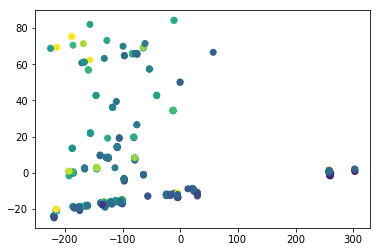

In [21]:
# Usar PCA para reducir a dos componentes y ver si se destacan outliers.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print X_pca.shape

# resumir la información en dos dimensiones.
plt.scatter(X_pca[:,0], X_pca[:,1], c = y )

In [22]:
X_pca[X_pca[:,1]<10].shape

(432, 2)

In [23]:
X_new = X[X_pca[:,1]<10]
y_new = y[X_pca[:,1]<10]

In [25]:
#clusterizar para ver los grupos naturales de los datos, graficar x,y
from sklearn.cluster import KMeans 

kmeans_model = KMeans(n_clusters = 2, random_state=1,max_iter=600).fit(X_new)
labels = kmeans_model.labels_

In [26]:
# Create a trace
trace = go.Scatter(
    x = X_new.coordx,
    y = X_new.coordy,
    text = "X: "+X_new.coordx.astype(str)+"<br>Y: "+X_new.coordy.astype(str)+"<br> Valor: "+y_new.astype(str),
    mode = 'markers',
    marker = dict(
        color = labels,       
    )
)

data = [trace]

layout = go.Layout(
        title = "Clusters",
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-bubble-map-populations' )

In [27]:
kmeans_model = KMeans(n_clusters = 2, random_state=1).fit(X_pca)
labels = kmeans_model.labels_

%.......................

In [28]:
#Deben haber outliers porque l hacer validacion cruzada los folds tienen muy diferente R2
# Comparacion de un clasificador usando diferentes conjuntos de características
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.pipeline import Pipeline 
from sklearn.tree import DecisionTreeRegressor
#svr, lr,elastic ,knn,Dt
scorer = make_scorer(mean_squared_error)
#first scale data!
pipe = Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeRegressor())])
scores = cross_val_score(pipe, X, y, cv=5) #, scoring=scorer #default r2
print scores,np.mean(scores), np.std(scores)

[ 0.33194892  0.43862843  0.46082535  0.38359031 -0.38693761] 0.245611076651 0.319431749087


In [29]:
X_rfe = X[['rio','cuartos','distanciaempleo','tasaeducativa','pobreza','coordy']]
pipe = Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeRegressor())])
#first scale data!
scores = cross_val_score(pipe, X_rfe, y, cv=5) #, scoring=scorer #default r2
print scores, np.mean(scores), np.std(scores)

[ 0.45698192  0.73452676  0.59858731  0.18840687 -1.46170804] 0.103358963774 0.803161374065
